In [ ]:
import behavior.behavioral_epoch_tools as bet
import numpy as np


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Option 1: ITI's and  tiny bouts

Threshold_bouts allows you to combine events with small interbout intervals and remove tiny events. This function combines events first and then removes any outlying small event. 

This is useful for social events (sniffing) or port entries where repeated event may not want to be considered as stand alone events with unique starts and stops when looking at ephys data. Or when behavioral data has been collected through hand scoring and you may have stary key board clicks or trigger happy scorers who like to score in short bursts. 

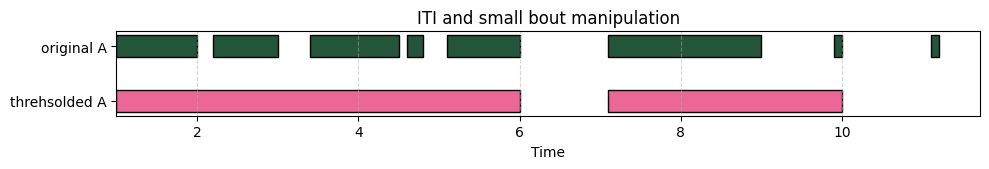

In [2]:
eventA = [[1,2],
        [2.2,3],
        [3.4, 4.5],
        [4.6,4.8],
        [5.1, 6],
        [7.1,9],
        [9.9, 10],
        [11.1,11.2]]

thresholded = bet.threshold_bouts(eventA, min_iti = 1, min_bout = .5)

bet.plot_event_bars(eventA, {'threhsolded A': thresholded}, title = 'ITI and small bout manipulation')


# Option 2: First events

For many of our behavioral experiments we have a cue and then we have some behavioral read out and thus the first behavioral event post cue onset has a special meaning. 

The following function will return the first eventA that happens after eventB onset. It has two parameters, *overlap* and *delay*. 

If overlap is set to true then event As that started before eventB onset but end after eventB onset will be included. Useful for port entries that started before tone onset but continued until after tone onset.

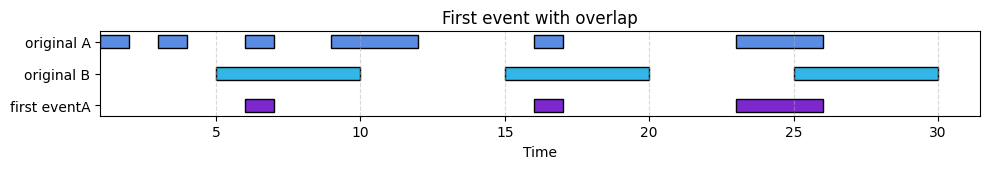

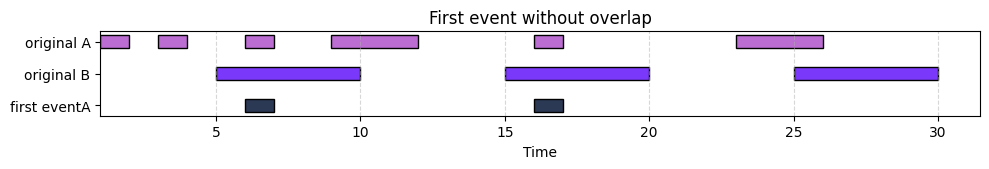

In [3]:
eventA = [
    [1, 2],   
    [3, 4],   
    [6, 7],   
    [9, 12], 
    [16,17],
    [23,26] 
]

eventB = [
    [5, 10],   
    [15, 20],
    [25,30]  ]

first_events = bet.first_eventA_after_eventB(eventA, eventB, overlap= True, delay = 0)
bet.plot_event_bars(eventA, eventB=eventB, event_dict = {'first eventA': first_events}, title = 'First event with overlap')
first_events = bet.first_eventA_after_eventB(eventA, eventB, overlap= False, delay = 0)
bet.plot_event_bars(eventA, eventB=eventB, event_dict = {'first eventA': first_events}, title = 'First event without overlap')


Sometimes are cues are earlier than the associated outcome. *Delay* allows us to calculate first eventA's that happen after time, t, after event B onset. Importantly, *delay* must be in the same unit of time as the input arrays for eventA and eventB.

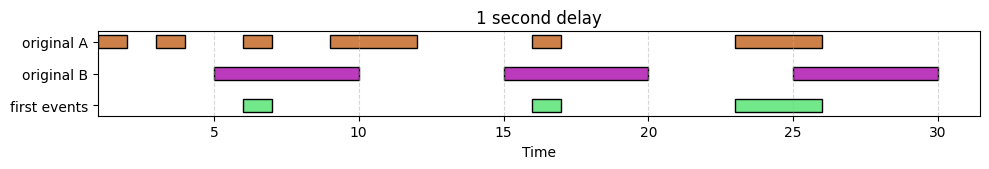

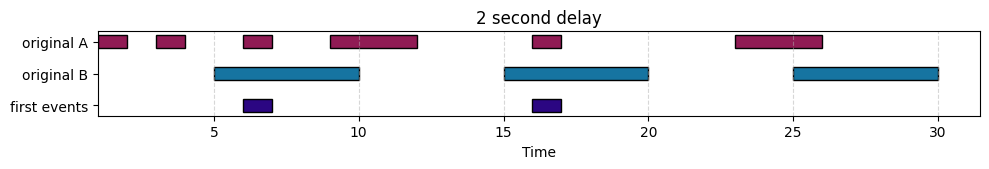

In [4]:
eventA = [
    [1, 2],   
    [3, 4],   
    [6, 7],   
    [9, 12], 
    [16,17],
    [23,26]  
]

eventB = [
    [5, 10],  
    [15, 20],
    [25,30]]
first_events_with_delay = bet.first_eventA_after_eventB(eventA, eventB, overlap= True, delay = 1)
bet.plot_event_bars(eventA, eventB=eventB, event_dict= {'first events': first_events_with_delay}, title = '1 second delay')
first_events_with_delay = bet.first_eventA_after_eventB(eventA, eventB, overlap= True, delay = 2)
bet.plot_event_bars(eventA, eventB=eventB, event_dict= {'first events': first_events_with_delay}, title = '2 second delay')

Importantly, eventAs that happen after the offset of eventB will still be included.

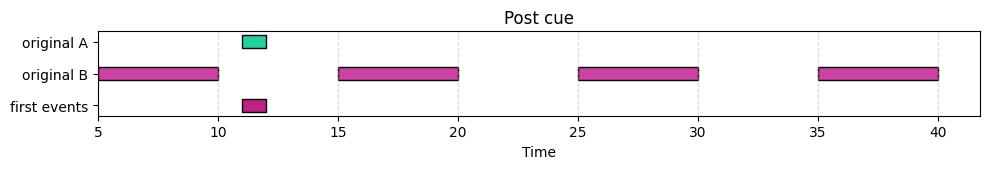

In [5]:
eventA = [ 
    [11, 12], 
]

eventB = [
    [5, 10],   
    [15, 20],
    [25,30],
    [35,40]   

]
first_events_with_delay = bet.first_eventA_after_eventB(eventA, eventB, overlap= True, delay = 1)
bet.plot_event_bars(eventA, eventB=eventB, event_dict= {'first events': first_events_with_delay}, title = 'Post cue')

# Option 3: Overlapping events

Sometimes, we will want to create events based on how much two other events overlap. Two cases where this might be useful is social data and med pc operant chamber data. 

This function has 4 modes that we will go over with use cases for each. These modes are:
- *combine*: combines overlapping events from the earliest start to the latest stop time within a group of overlapping events
- *overlap*: combines overlapping events by creating new events of ONLY the overlapping chunks (will ignoring/not including non_overlapping bits)
- *split*: combines overlapping events by creating new events of ONLY the overlapping chunks but will also label the nonoverlapping bits and pieces with the original labels
- *duplicate*: creates two new events based on overlap. If event A and event B overlap, new event 1 will have the same start and stop time as event A and new event 2 will have the same start and stop time as event B

Parameters that will we also learn about are *overlap_threshold* and *return_nonoverlap*.
  

For each mode you will receive an event dictionary back. 

For combine, overlap, and split, the dictionary will look like:

```
event_dict = {'eventA': [[start,stop], [start,stop]],
                'eventB': [[start,stop], [start,stop]],
                'event3': [[start,stop], [start,stop]]}
```

where the keys mean
- eventA = isolated event As that do not overlap with B
- eventB = isolated event Bs that do not overlap with A
- event3 = overlapping events 

for the mode duplicate will not get back an event3 instead you will get back event1 and event2 as keys
- event1 = overlapping events with the start and stop times derived from event A
- event2 = overlapping events with the start and stop times derived from event B

and the values are numpy arrays of start and stop times in the same unit of time that the input arrays were in. So the shape of the numpy array will be (n,2) where n is the number of events and 2 is for the start and stop times.

## Combine

A simple example is that a cue, let us say cue A, might be associated with outcome A, but if it is paired with cue B then it will be associated with outcome B. Thus, if cue A + cue B, then outcome B, but if cue A and no cue B, then outcome A.



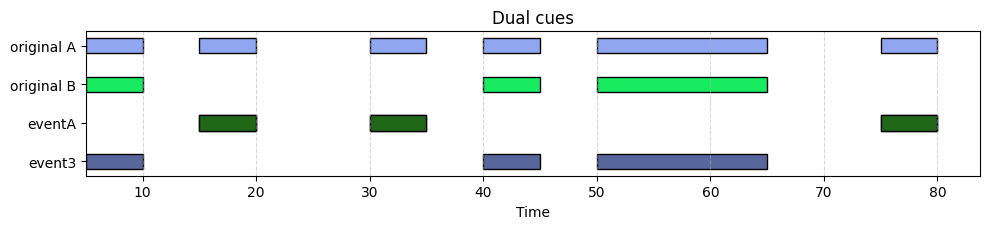

In [6]:
cueA = [[5,10],
        [15,20],
        [30,35],
        [40,45],
        [50,65],
        [75,80]]

cueB = [[5,10],
        [40,45],
        [50,65]]

# in the returned event_dictionary we get 2 new events: event 3 and event A 
# event A = event A's that happened without event B
# event 3 = new combo event that happens when event A and B happen at the same time 

new_event_dict = bet.overlapping_events(cueA,
                                        cueB,
                                        overlap_threshold=0,
                                        mode = 'combine',
                                        return_nonoverlap = True)
bet.plot_event_bars(eventA= cueA, eventB = cueB, event_dict = new_event_dict, title = 'Dual cues')

### Return nonoverlap

If the return_nonoverlap parameter is set to false we will not get back isolated events A or B (ie event A no event  B, or event B no event A).

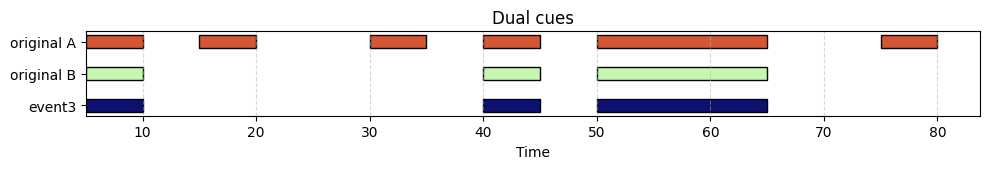

In [7]:

new_event_dict = bet.overlapping_events(cueA,
                                        cueB,
                                        overlap_threshold=0,
                                        mode = 'combine',
                                        return_nonoverlap = False)
bet.plot_event_bars(eventA= cueA, eventB = cueB, event_dict = new_event_dict, title = 'Dual cues')                                        

### Overlap threshold

For social behavior, overlapping sniffs can be classified as reciprocal social interactions. How and which sniffs get labeled as reciprocal and when do they start and stop is a tricky and research-specific question. 

Here, we are still using the combine mode used above and we are playing with the overlap_threshold parameter. The way this is calculated for combine, split, and overlap is by calculating the total overlap time within an overlapping group and dividing it by the entire duration of the overlapping group. 

If a group of more than 2 events does not pass the threshold, individual pairs of events will be tested for overlap threshold.

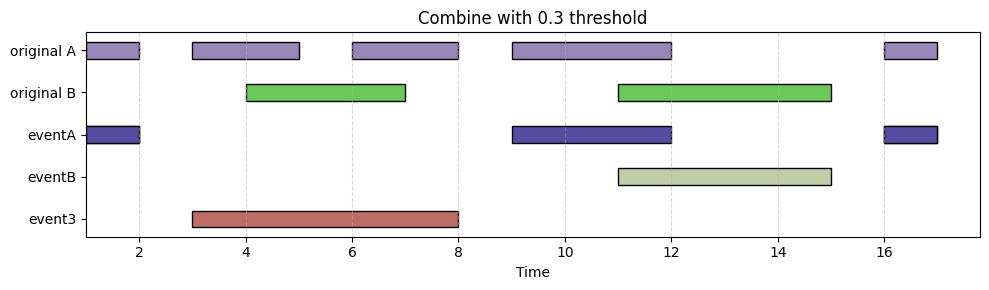

no overlap


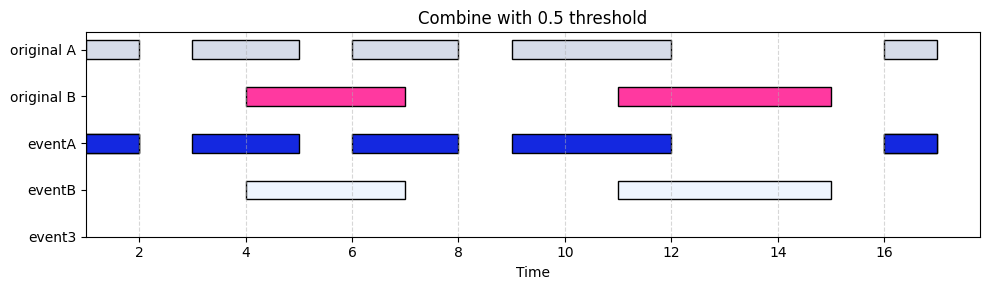

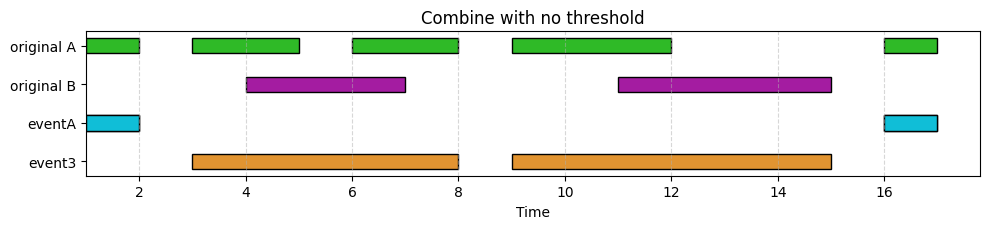

In [8]:
eventA = [
    [1, 2],   
    [3, 5],   
    [6, 8],   
    [9, 12], 
    [16,17]  
]

eventB = [
    [4, 7],   
    [11, 15],   
]

# with a threshold of 0.3 we get a single overlapping event from 3 to 8
# but no overlapping event from 9 to 15
combine_dict = bet.overlapping_events(eventA, eventB, overlap_threshold=0.3, mode = 'combine', return_nonoverlap=True)
bet. plot_event_bars(eventA, eventB = eventB, event_dict = combine_dict, title = 'Combine with 0.3 threshold')

# with a threshold of 0.5 we get no overlapping events what so ever
combine_dict = bet.overlapping_events(eventA, eventB, overlap_threshold=0.5, mode = 'combine', return_nonoverlap=True)
bet. plot_event_bars(eventA, eventB = eventB, event_dict = combine_dict, title = 'Combine with 0.5 threshold')

# with a threshold of 0, all overlapping events get combined
combine_dict = bet.overlapping_events(eventA, eventB, overlap_threshold=0, mode = 'combine', return_nonoverlap=True)
bet. plot_event_bars(eventA, eventB = eventB, event_dict = combine_dict, title = 'Combine with no threshold')

## Split and Overlap

If you want extreme precision on labels, then split is your function. It labels every chunk as overlapping or gives back the original label. Such that events from 3 to 8 are broken into 5 chunks, two just A chunks, one just B chunk, and two overlap chunks. 

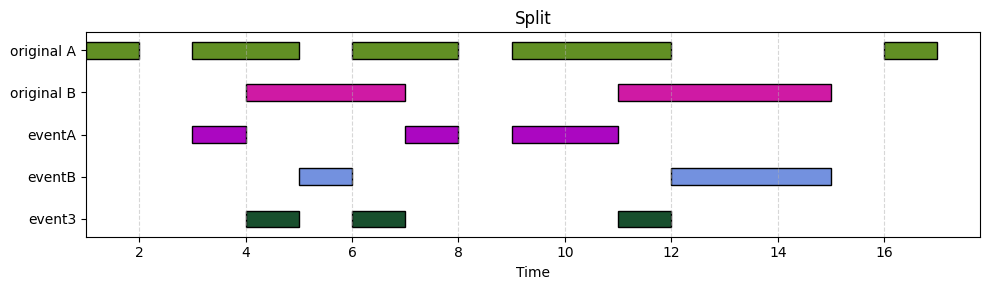

In [9]:
eventA = [
    [1, 2],   
    [3, 5],   
    [6, 8],   
    [9, 12], 
    [16,17]  
]

eventB = [
    [4, 7],   
    [11, 15],   
]

split_dict = bet.overlapping_events(eventA,
                                    eventB,
                                    overlap_threshold=0,
                                    mode = 'split',
                                    return_nonoverlap=True)
bet.plot_event_bars(eventA, eventB = eventB, event_dict = split_dict, title = 'Split')


Notably, split and overlap will return the same event dictionary if you set the return_nonoverlap parameter to false. 

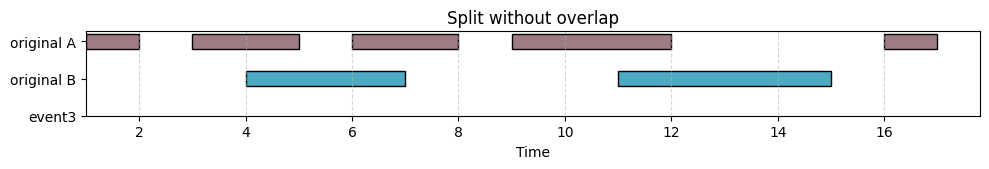

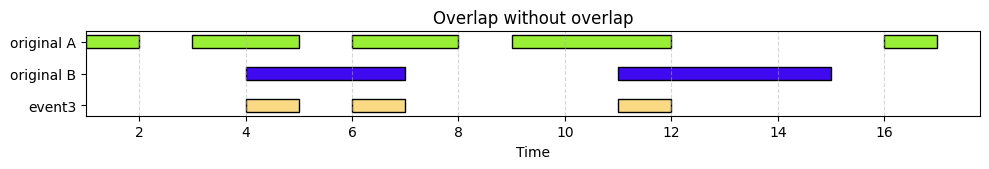

In [10]:
split_dict = bet.overlapping_events(eventA,
                                    eventB,
                                    overlap_threshold=0,
                                    mode = 'split',
                                    return_nonoverlap=False)
overlap_dict = bet.overlapping_events(eventA,
                                    eventB,
                                    overlap_threshold=0,
                                    mode = 'overlap',
                                    return_nonoverlap=False)                                    
bet.plot_event_bars(eventA, eventB = eventB, event_dict = split_dict, title = 'Split without overlap')
bet.plot_event_bars(eventA, eventB = eventB, event_dict = overlap_dict, title = 'Overlap without overlap')


With the return nonoverlap parameter set to true, the difference between split and overlap is what it does with the nonoverlapping chunks within a set of overlapping events. In both cases, the first and last event A are kept. But the nonoverlapping chunks from 3-8 and from 9-15 are removed and ignored in overlap. They are neither in the new eventA and eventB arrays nor are they in the new event3 array.

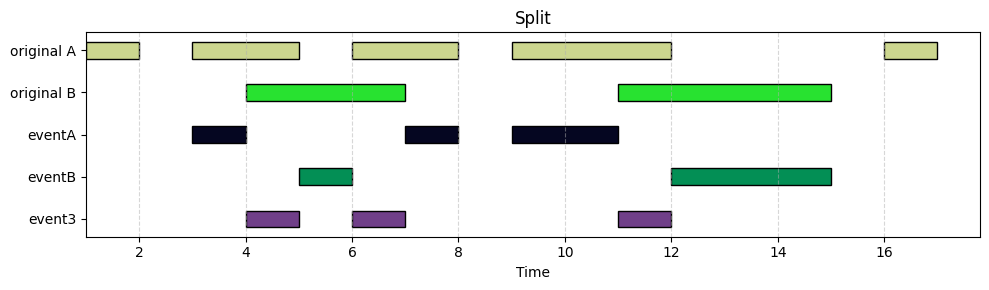

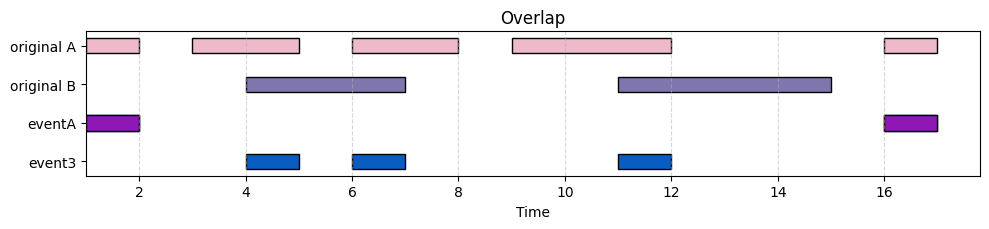

In [11]:
split_dict = bet.overlapping_events(eventA,
                                    eventB,
                                    overlap_threshold=0,
                                    mode = 'split',
                                    return_nonoverlap=True)
overlap_dict = bet.overlapping_events(eventA,
                                    eventB,
                                    overlap_threshold=0,
                                    mode = 'overlap',
                                    return_nonoverlap=True)                                    
bet.plot_event_bars(eventA, eventB = eventB, event_dict = split_dict, title = 'Split')
bet.plot_event_bars(eventA, eventB = eventB, event_dict = overlap_dict, title = 'Overlap')


## Duplicate

Let's say you want to label sniffs as reciprocal or not, but you want to keep the events of interest for your subject and social agent dependent on the actual times that your mice are sniffing. You could use duplicate.

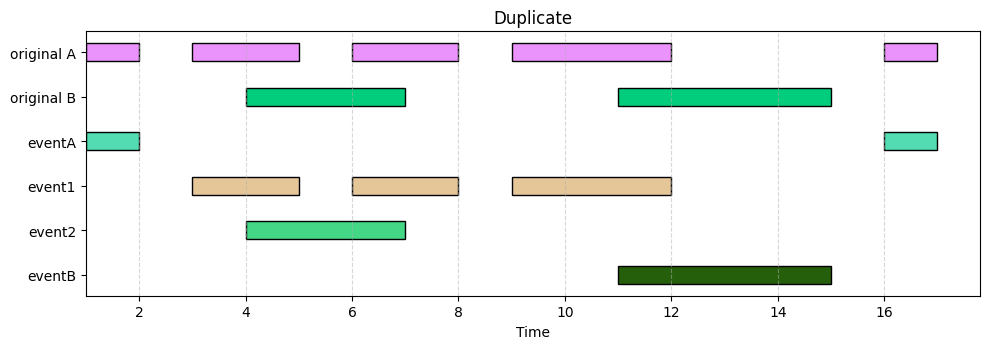

In [12]:
mouse1_sniffs = [
    [1, 2],   
    [3, 5],   
    [6, 8],   
    [9, 12], 
    [16,17]  
]

mouse2_sniffs = [
    [4, 7],   
    [11, 15],   
]

duplicate_dict = bet.overlapping_events(mouse1_sniffs, mouse2_sniffs, overlap_threshold=0.3, mode = 'duplicate', return_nonoverlap=True)


bet.plot_event_bars(mouse1_sniffs, eventB = mouse2_sniffs, event_dict = duplicate_dict, title = 'Duplicate')

So now eventA is mouse1 sniffing mouse2 without mouse2 sniffing mouse1 which you can see at the beginning and end of graph.

Event 1 is when mouse1 is sniffing reciprocally with mouse2 but maintains start and stop times of when mouse1 is actively engaged in sniffing. And event2 is when mouse2 is sniffing reciprocally with mouse1 but only when mouse2 is actively sniffing. 

What is going on with the third event1 and eventB? For duplicate, the event label is based on the proportion of that single event that is overlapping. Thus orginal event A (mouse1 sniffing mouse2) overlapped enough from 9-12 to count as reciprocal. But orignal event B (mouse2 sniffing mouse1) from 11 to 15 did not get labeled as reciprocal for mouse2 and thus maintained the label eventB.

# Option 5: Random Event Generator

Let's say you have a 60 second habituation period of your experiment and you want to compare neural activity during events during the epxeriment to a baseline firing rate. If you want a SD for those baseline firing rates you may need to generate random events during your baseline for comparison. 

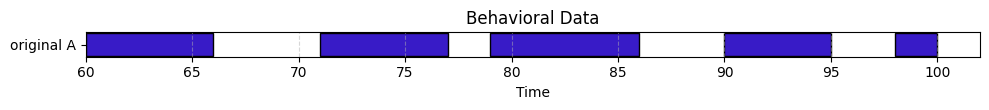

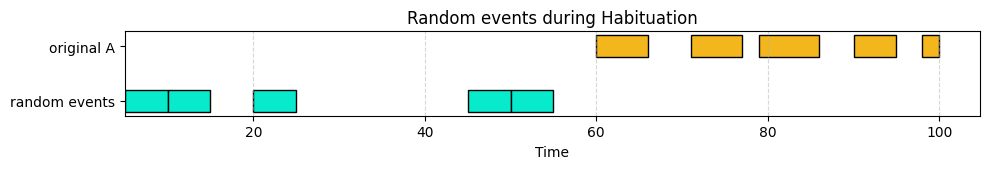

In [20]:
eventA = np.array([
        [10,16],
        [21,27],
        [29,36],
        [40,45],
        [48,50]])
new_eventA = eventA + 50

bet.plot_event_bars(new_eventA, event_dict = {}, title = 'Behavioral Data')

random_events = bet.random_event_generator(start = 0, stop = 60, len_event = 5, no_events = 5)

bet.plot_event_bars(new_eventA, event_dict = {'random events': random_events}, title = 'Random events during Habituation')




# Putting it all together

Let us say we have a situation where we have two cues. One cue is associated with one mouse getting a reward and both cues are associated with both mice getting a reward. The reward is coming out of a reward port and we have port entries. We are interested in the neuroloigcal data during reward pick up for when both mice get the reward and for when only one mouse gets the reward. 

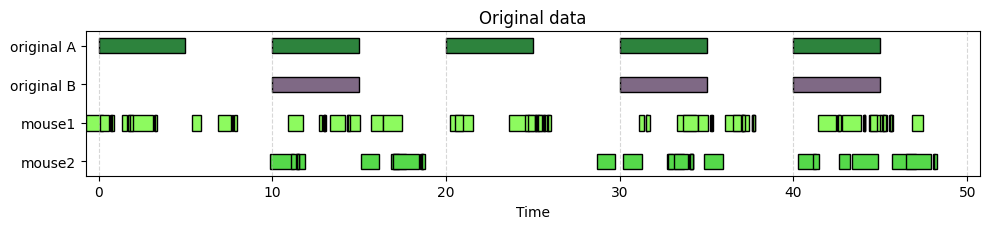

In [14]:
cueA = [[0,5],
        [10,15],
        [20,25],
        [30,35],
        [40,45]]

cueB = [[10,15],
        [30,35],
        [40,45]]

def generate_port_entries_around_cues(cues, num_entries=5, spread_before=1.5, spread_after=2.0, repeated_entries=False):
    entries = []
    for start, end in cues:
        mid = (start + end) / 2
        for _ in range(num_entries):
            entry_start = np.random.uniform(start - spread_before, end + spread_after)
            duration = np.random.uniform(0.1, 1.5)
            entry_end = entry_start + duration
            entries.append([entry_start, entry_end])
            if repeated_entries and np.random.rand() > 0.5:
                # Generate rapid repeated pokes
                for i in range(np.random.randint(2, 4)):
                    offset = np.random.uniform(0.05, 0.2)
                    duration = np.random.uniform(0.05, 0.2)
                    entries.append([entry_end + offset, entry_end + offset + duration])
    return np.array(sorted(entries, key=lambda x: x[0]))

# Generate synthetic port entries for mouse1 and mouse2
np.random.seed(42)
mouse1_port_entry = generate_port_entries_around_cues(cueA, num_entries=6, repeated_entries=True)
mouse2_port_entry = generate_port_entries_around_cues(cueB, num_entries=6, repeated_entries=True)


bet.plot_event_bars(cueA, eventB = cueB, event_dict = {'mouse1': mouse1_port_entry, 'mouse2': mouse2_port_entry}, title = 'Original data')


First, lets combine port entries that happened in close succession. 

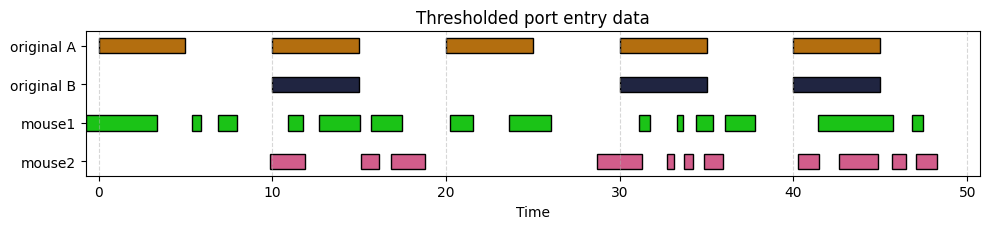

In [15]:
new_mouse1_port = bet.threshold_bouts(mouse1_port_entry, min_iti = 0.5, min_bout=0.1)
new_mouse2_port = bet.threshold_bouts(mouse2_port_entry, min_iti = 0.5, min_bout=0.1)

bet.plot_event_bars(cueA, eventB = cueB, event_dict = {'mouse1': new_mouse1_port, 'mouse2': new_mouse2_port}, title = 'Thresholded port entry data')


Now lets calculate shared rewards vs only mouse 1 rewards.

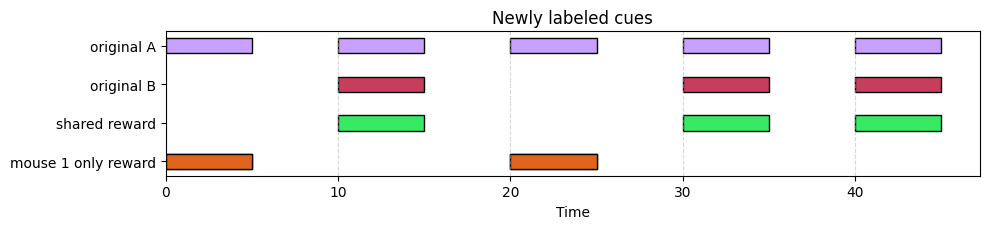

In [16]:
cues = bet.overlapping_events(cueA, cueB, overlap_threshold=0, mode= 'combine', return_nonoverlap=True)
cues['shared reward'] = cues.pop('event3')
cues['mouse 1 only reward'] = cues.pop('eventA')

bet.plot_event_bars(cueA, eventB=cueB, event_dict = cues, title = 'Newly labeled cues')

And now we want when mouse 1 picks up the reward from the reward port after each cue. We will assume the first port entry after cue onset is the reward pick up. Therefore we want the first port entry from mouse 1 during shared cues and we want the first port entry from mouse 1 during mouse 1 only reward cues. Importnatly, reward delivery is delayed by 2.5 seconds. 

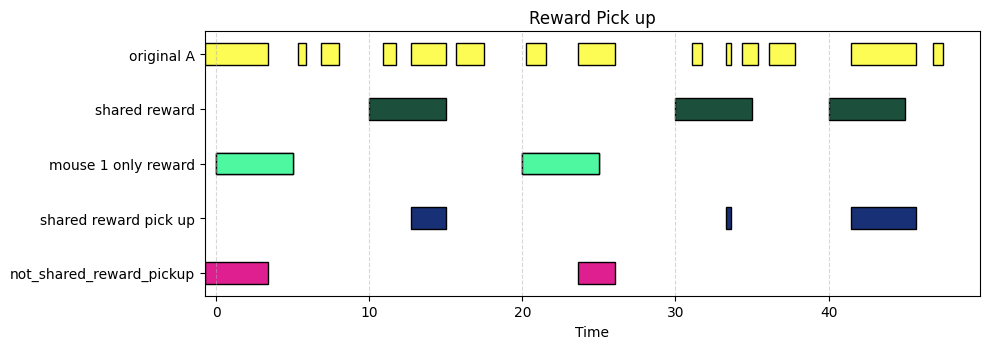

In [17]:
cues['shared reward pick up'] = bet.first_eventA_after_eventB(new_mouse1_port, cues['shared reward'], overlap = True, delay = 2.5)
cues['not_shared_reward_pickup'] = bet.first_eventA_after_eventB(new_mouse1_port, cues['mouse 1 only reward'], overlap = True, delay = 2.5)

bet.plot_event_bars(new_mouse1_port, event_dict = cues, title = 'Reward Pick up')